In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True

/Users/hanboshao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  


In [2]:
data = pd.read_csv("train.csv")

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [4]:
columns = ['LotArea', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
    'MasVnrArea', 'ExterQual', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea',
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
    'YrSold', 'SalePrice']
df_model = data[columns]
df_target = df_model[['SalePrice']]
df_features = df_model.drop('SalePrice', axis = 1)

In [5]:
HS_dummy = pd.get_dummies(df_features['HouseStyle'], prefix='HS', prefix_sep='__', drop_first = True)
df_features = pd.concat([df_features.drop('HouseStyle', axis=1), HS_dummy], axis=1)
EQ_dummy = pd.get_dummies(df_features['ExterQual'], prefix='EQ', prefix_sep='__', drop_first = True)
df_features = pd.concat([df_features.drop('ExterQual', axis=1), EQ_dummy], axis=1)
HQC_dummy = pd.get_dummies(df_features['HeatingQC'], prefix='HQC', prefix_sep='__',drop_first = True)
df_features = pd.concat([df_features.drop('HeatingQC', axis=1), HQC_dummy], axis=1)
KQ_dummy = pd.get_dummies(df_features['KitchenQual'], prefix='KQ', prefix_sep='__',drop_first = True)
df_features = pd.concat([df_features.drop('KitchenQual', axis=1), KQ_dummy], axis=1)

In [6]:
df_features.fillna(0, inplace = True)
# df_features.to_csv('df_regularized_reg.csv')

In [7]:
ridge = Ridge()

In [8]:
alphas = np.arange(0,20)
ridge.set_params(normalize=True)
coefs  = []
scores = []
for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(df_features, df_target)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(df_features, df_target))

In [9]:
for i in range(len(coefs)):
    coefs[i] = coefs[i].flatten()

In [10]:
coefs = pd.DataFrame(coefs, index = alphas, columns = df_features.columns)  
pd.set_option('display.max_columns', None)
# coefs

Text(0, 0.5, 'slope values')

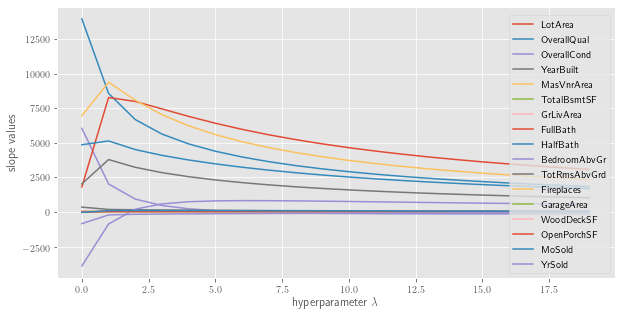

In [11]:
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.columns[:17]:
    plt.plot(coefs.index, coefs[name], label=name)
plt.legend(loc=4)   
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

In [12]:
lasso  = Lasso()
alphas = np.linspace(0.01,100,20)
lasso.set_params(normalize=True)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(df_features, df_target)  
        coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = df_features.columns)  
pd.set_option('display.max_columns', None)
# coefs_lasso

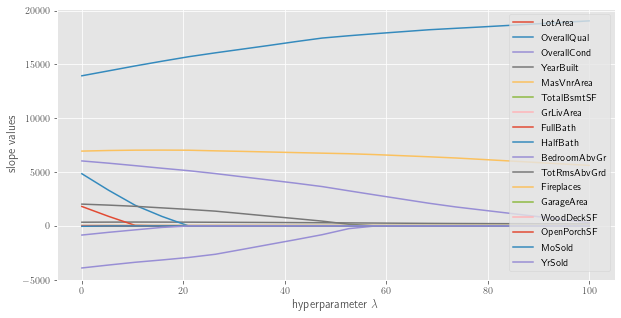

In [13]:
for name in coefs_lasso.columns[:17]:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1) 

In [14]:
from sklearn.model_selection import train_test_split
np.random.seed(100)  # changing the random seed can produce different scenarios which lead to exceptions
X_train, X_test, Y_train, Y_test = train_test_split(df_features,df_target,test_size=0.2)

In [15]:
ridge.set_params(normalize=True)
lasso.set_params(normalize=True)
ridge_scores_train = []
lasso_scores_train = []
ridge_scores_test  = []
lasso_scores_test  = []

alphas = np.linspace(0.01, 1000, 100)

for alpha in alphas:
            ridge.set_params(alpha=alpha)
            lasso.set_params(alpha=alpha)
            ridge.fit(X_train, Y_train)
            lasso.fit(X_train, Y_train)
            ridge_scores_train.append(ridge.score(X_train, Y_train))
            ridge_scores_test.append(ridge.score(X_test, Y_test))
            lasso_scores_train.append(lasso.score(X_train, Y_train))
            lasso_scores_test.append(lasso.score(X_test, Y_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

Text(0, 0.5, '$R^2$')

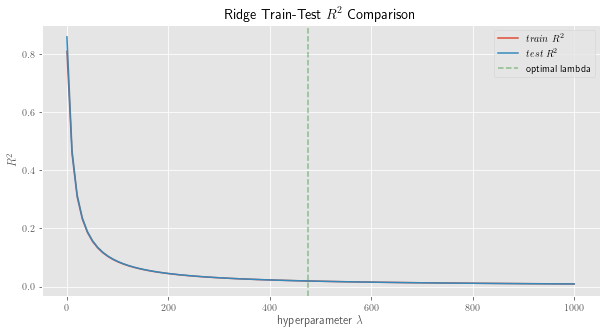

In [16]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge Train-Test $R^2$ Comparison')
ridge_underfit = ridge_scores_train < ridge_scores_test
last_underfit  = np.max(alphas[ridge_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

Text(0, 0.5, '$R^2$')

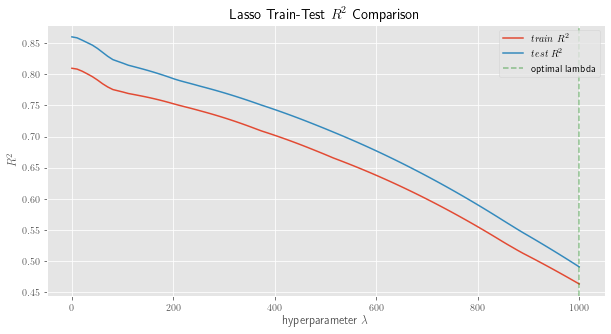

In [17]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
lasso_underfit = lasso_scores_train < lasso_scores_test
last_underfit  = np.max(alphas[lasso_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')